<a href="https://colab.research.google.com/github/sgkks/EnvDatSci/blob/main/Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#attach to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Install packages for Google Colab
%%capture
!pip install rasterio
!pip install earthpy

In [3]:
# Import necessary packages
import os
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.plot import plotting_extent
import numpy as np
import earthpy as et
import earthpy.plot as ep

In [4]:
!pip install geopandas

In [5]:
!pip install earthpy
!pip install rtree
!pip install pygeos
!pip install mapclassify>=2.4.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 543.2/543.2 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 21.8 MB/s eta 0:00:00


In [6]:
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import earthpy as et

In [7]:
folder_path = '/content/drive/My Drive/CEE609/ResearchData'

os.chdir(folder_path)

print(os.getcwd())

list_dir = os.listdir(folder_path)

print(list_dir)


/content/drive/My Drive/CEE609/ResearchData
['Water_Main_Breaks_(2004-2019).shp', 'Water_Main_Breaks_(2004-2019).shx', 'Water_Main_Breaks_(2004-2019).cpg', 'Water_Main_Breaks_(2004-2019).prj', 'Water_Main_Breaks_(2004-2019).dbf', 'SYRCityline_Requests_(2021-Present).xml', 'SYRCityline_Requests_(2021-Present).shp', 'SYRCityline_Requests_(2021-Present).dbf', 'SYRCityline_Requests_(2021-Present).cpg', 'SYRCityline_Requests_(2021-Present).prj', 'SYRCityline_Requests_(2021-Present).shx', 'columns.csv', 'usa.cpg', 'usa.prj', 'usa.dbf', 'usa.shx', 'usa.shp', 'Syracuse_City_Boundary.cpg', 'Syracuse_City_Boundary.shx', 'Syracuse_City_Boundary.xml', 'Syracuse_City_Boundary.prj', 'Syracuse_City_Boundary.shp', 'Syracuse_City_Boundary.dbf', 'modified_water_main_breaks.prj', 'modified_water_main_breaks.cpg', 'modified_water_main_breaks.dbf', 'modified_water_main_breaks.shx', 'modified_water_main_breaks.shp', 'modified_geodataframe.shp', 'modified_geodataframe.shx', 'modified_geodataframe.dbf', 'modi

In [8]:
import geopandas as gpd

# Assuming the file is in the current working directory (which you set previously)
file_path = 'Water_Main_Breaks_(2004-2019).shp'

# Read the shapefile using geopandas
water_main_breaks = gpd.read_file(file_path)

# Print some info to check if it loaded correctly
print(water_main_breaks.head())
print(water_main_breaks.info())


    fullDate                location  leakClass month  date weekday    year  \
0 2011-01-14       1205 W FAYETTE ST          0   1.0  14.0    None  2011.0   
1 2011-01-14     1003 JAMESVILLE AVE          0   1.0  14.0    None  2011.0   
2 2011-01-14  PALMER AVE & CHENEY ST          0   1.0  14.0    None  2011.0   
3 2011-01-16       2100 E FAYETTE ST          0   1.0  16.0    None  2011.0   
4 2011-01-17        206 BUTTERNUT ST          0   1.0  17.0    None  2011.0   

  week        lon        lat  ObjectId                          geometry  
0  2.0 -76.175575  43.046733         1  POINT (-8479826.176 5319087.828)  
1  2.0 -76.128918  43.016895         2  POINT (-8474632.427 5314543.828)  
2  2.0 -76.162257  43.030022         3  POINT (-8478343.686 5316542.657)  
3  3.0 -76.113683  43.048158         4   POINT (-8472936.428 5319304.88)  
4  3.0 -76.151936  43.057713         5  POINT (-8477194.752 5320760.511)  
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3042 entries, 0 t

In [41]:
import geopandas as gpd

# Assuming the file is in the current working directory (which you set previously)
file_path = 'Water_Main_Breaks_(2004-2019).shp'

# Read the shapefile using geopandas
water_main_breaks = gpd.read_file(file_path)

# Create a list of ObjectIDs to remove
object_ids_to_remove = [2932, 2933, 2934, 2935]

# Filter the GeoDataFrame to exclude the specified ObjectIDs
water_main_breaks = water_main_breaks[~water_main_breaks.ObjectId.isin(object_ids_to_remove)]

file_path = 'Syracuse_City_Boundary.shp'

# Read the shapefile using geopandas
boundary_area = gpd.read_file(file_path)

# Clip water_main_breaks to boundary_area
clipped_water_main_breaks = gpd.clip(water_main_breaks, boundary_area)

# Print some info to check if the rows were removed
print(clipped_water_main_breaks.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 2992 entries, 1771 to 2253
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   fullDate   2991 non-null   datetime64[ms]
 1   location   2980 non-null   object        
 2   leakClass  2992 non-null   int32         
 3   month      2991 non-null   object        
 4   date       2991 non-null   object        
 5   weekday    0 non-null      object        
 6   year       2991 non-null   object        
 7   week       2991 non-null   object        
 8   lon        2992 non-null   float64       
 9   lat        2992 non-null   float64       
 10  ObjectId   2992 non-null   int32         
 11  geometry   2992 non-null   geometry      
dtypes: datetime64[ms](1), float64(2), geometry(1), int32(2), object(6)
memory usage: 280.5+ KB
None


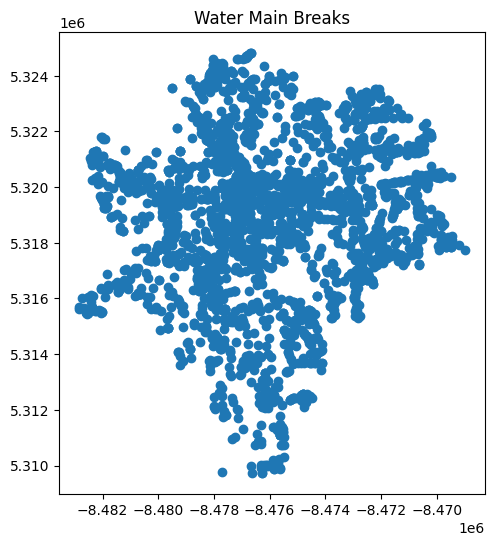

In [43]:
# Plot the data
f, ax1 = plt.subplots(figsize=(12, 6))
clipped_water_main_breaks.plot(ax=ax1)

# Add a title to your plot
ax1.set(title="Water Main Breaks")
plt.show()

In [11]:
import geopandas as gpd

# Assuming the file is in the current working directory (which you set previously)
file_path = 'usa.shp'

# Read the shapefile using geopandas
burden_categories = gpd.read_file(file_path)

# Print some info to check if it loaded correctly
print(burden_categories.head())
print(burden_categories.info())

       GEOID10       SF                CF  DF_PFS  AF_PFS  HDF_PFS  DSF_PFS  \
0  01073001100  Alabama  Jefferson County    0.96    0.85     0.72     0.84   
1  01073001400  Alabama  Jefferson County    0.98    0.83     0.92     0.93   
2  01073002000  Alabama  Jefferson County    0.98    0.97     0.94     0.76   
3  01073003802  Alabama  Jefferson County    0.95    0.91     0.62     0.79   
4  01073004000  Alabama  Jefferson County    0.99    0.96     0.96     0.86   

   EBF_PFS  EALR_PFS  EBLR_PFS  ...  AGE_10  AGE_MIDDLE  AGE_OLD  TA_COU_116  \
0     0.86      0.21      0.78  ...    0.13        0.66     0.20         NaN   
1     0.97      0.08      0.91  ...    0.08        0.72     0.18         NaN   
2     0.93      0.08      0.64  ...    0.15        0.71     0.12         NaN   
3     0.97      0.07      0.90  ...    0.14        0.72     0.13         NaN   
4     0.98       NaN      0.95  ...    0.06        0.68     0.24         NaN   

   TA_COUNT_C  TA_PERC  TA_PERC_FE  UI_EXP  

In [12]:
import geopandas as gpd

# Assuming the file is in the current working directory (which you set previously)
file_path = 'SYRCityline_Requests_(2021-Present).shp'

# Read the shapefile using geopandas
existing_potholes = gpd.read_file(file_path)

# Print some info to check if it loaded correctly
print(existing_potholes.head())
print(existing_potholes.info())

         Id              Summary  Rating  \
0  10139153             Potholes       2   
1  10568233  Weekly Trash Pickup       2   
2  10568243  Weekly Trash Pickup       2   
3  10568255            Recycling       2   
4  10568301            Recycling       2   

                                     Address  \
0  101 Ny-5 Syracuse NY 13204, United States   
1   304 Mildred Ave Syracuse, NY, 13206, USA   
2    113 Neutral Ct Syracuse, NY, 13208, USA   
3       100 Arch St Syracuse, NY, 13206, USA   
4       100 Arch St Syracuse, NY, 13206, USA   

                           Descriptio                           Agency_Nam  \
0  Pothole entering lot 3 parking lot  Streets, Sidewalks & Transportation   
1       did not take all of the trash        Garbage, Recycling & Graffiti   
2                             skipped        Garbage, Recycling & Graffiti   
3                             skipped        Garbage, Recycling & Graffiti   
4                   recycling skipped        Garbage, Re

In [13]:
# Filter the GeoDataFrame to include only rows where 'Summary' contains 'Pothole'
potholes_only = existing_potholes[existing_potholes['Summary'].str.contains('Potholes', case=False)]

# Print some info to check the extracted data
print(potholes_only.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 2424 entries, 0 to 60190
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Id          2424 non-null   int32   
 1   Summary     2424 non-null   object  
 2   Rating      2424 non-null   int32   
 3   Address     2424 non-null   object  
 4   Descriptio  1919 non-null   object  
 5   Agency_Nam  2424 non-null   object  
 6   Request_ty  2424 non-null   int32   
 7   URL         2424 non-null   object  
 8   Lat         2424 non-null   float64 
 9   Lng         2424 non-null   float64 
 10  Export_tag  2424 non-null   object  
 11  Created_at  2424 non-null   object  
 12  Acknowledg  243 non-null    object  
 13  Closed_at_  2411 non-null   object  
 14  Minutes_to  243 non-null    float64 
 15  Minutes__1  2411 non-null   float64 
 16  Assignee_n  2424 non-null   object  
 17  Category    2424 non-null   object  
 18  Sla_in_hou  2424 non-null   float64 
 19  Re

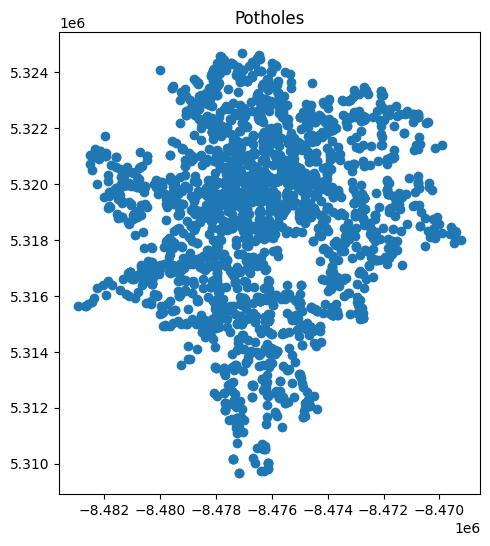

In [14]:
# Plot the data
f, ax1 = plt.subplots(figsize=(12, 6))
potholes_only.plot(ax=ax1)

# Add a title to your plot
ax1.set(title="Potholes")
plt.show()

In [15]:
import geopandas as gpd

# Assuming the file is in the current working directory (which you set previously)
file_path = 'Syracuse_City_Boundary.shp'

# Read the shapefile using geopandas
boundary_area = gpd.read_file(file_path)

# Print some info to check if it loaded correctly
print(boundary_area.head())
print(boundary_area.info())

   FID  FID_Syracu STATEFP10 COUNTYFP10 TRACTCE10      GEOID10 NAME10  \
0    1          54        36        067    000100  36067000100      1   

       NAMELSAD10 MTFCC10 FUNCSTAT10  ALAND10  AWATER10   INTPTLAT10  \
0  Census Tract 1   G5020          S  4842958   1284980  +43.0691355   

     INTPTLON10  TractID                                           geometry  
0  -076.1730170        1  POLYGON ((-8477821.69 5324574.363, -8477654.82...  
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   FID         1 non-null      int32   
 1   FID_Syracu  1 non-null      int32   
 2   STATEFP10   1 non-null      object  
 3   COUNTYFP10  1 non-null      object  
 4   TRACTCE10   1 non-null      object  
 5   GEOID10     1 non-null      object  
 6   NAME10      1 non-null      object  
 7   NAMELSAD10  1 non-null      object  
 8   MTFCC10     1 non-

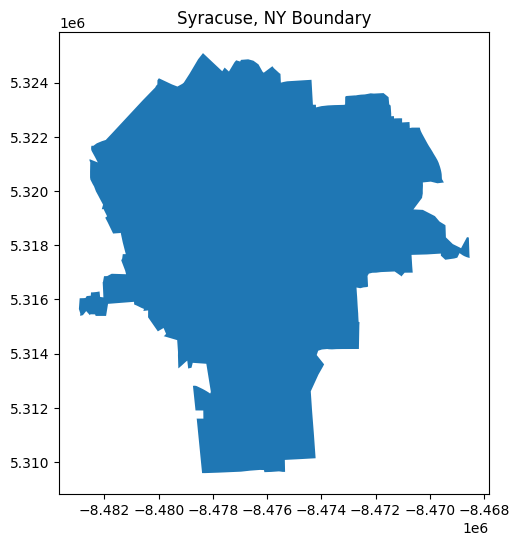

In [16]:
# Plot the data
f, ax1 = plt.subplots(figsize=(12, 6))
boundary_area.plot(ax=ax1)

# Add a title to your plot
ax1.set(title="Syracuse, NY Boundary")
plt.show()

       LIF_PFS  LMI_PFS  UF_PFS  HSEF  P100_PFS
43396     0.41     0.63    0.89  0.15      0.50
47335     0.55     0.07    0.33  0.09      0.24
43391     0.32     0.07    0.28  0.06      0.04
43649     0.41     0.29    0.66  0.05      0.44
43188     0.70     0.98    0.06  0.19      0.90


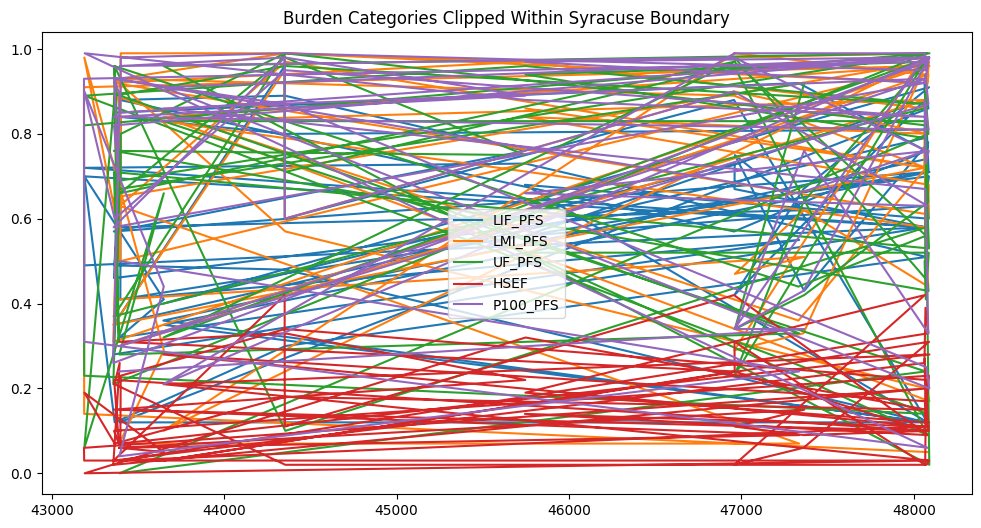

In [21]:
# Assuming 'usa.shp' contains the data for 'burden_categories'
import geopandas as gpd
burden_categories = gpd.read_file('usa.shp')  # Re-define burden_categories if necessary

# Now proceed with the clipping operation
boundary_area = boundary_area.to_crs(burden_categories.crs)
clipped_usa = gpd.clip(burden_categories, boundary_area)

extracted_data = clipped_usa[['LIF_PFS', 'LMI_PFS', 'UF_PFS', 'HSEF', 'P100_PFS']]
print(extracted_data.head())

# Plot the clipped data
f, ax = plt.subplots(figsize=(12, 6))
extracted_data.plot(ax=ax)
ax.set(title="Burden Categories Clipped Within Syracuse Boundary")
plt.show()

In [29]:
print(type(potholes_only))
print(type(extracted_data))

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'pandas.core.frame.DataFrame'>


       fullDate                 location  leakClass month  date weekday  \
1771 2012-07-23         316 BROADVIEW DR          0   7.0  23.0    None   
1763 2012-06-19             107 ALTON ST          0   6.0  19.0    None   
1595 2012-02-08         315 BROADVIEW DR          0   2.0   8.0    None   
2526 2015-09-03  315 BROADVIEW DR, 13215          0   9.0   3.0    None   
2954 2018-02-02  312 BROADVIEW DR, 13215          2   2.0   2.0    None   

        year  week        lon        lat  ...  Created_at Acknowledg  \
1771  2012.0  30.0 -76.200118  43.022878  ...         NaN        NaN   
1763  2012.0  25.0 -76.195723  43.023044  ...         NaN        NaN   
1595  2012.0   6.0 -76.199797  43.023080  ...         NaN        NaN   
2526  2015.0  36.0 -76.199797  43.023080  ...         NaN        NaN   
2954  2018.0   5.0 -76.200354  43.023101  ...         NaN        NaN   

      Closed_at_  Minutes_to Minutes__1  Assignee_n Category Sla_in_hou  \
1771         NaN         NaN        NaN  

<Axes: >

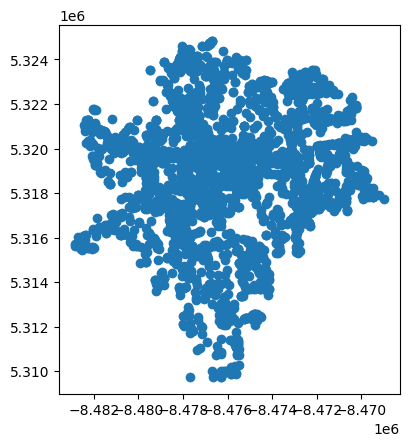

In [44]:
# Join water_main_breaks and potholes_only
water_main_potholes = gpd.sjoin(clipped_water_main_breaks, potholes_only, how='left', predicate='intersects')
print(water_main_potholes.head())
water_main_potholes.info()
water_main_potholes.plot()